In [249]:
%matplotlib inline

In [250]:
import matplotlib.pyplot as plt
import pandas as pd

In [251]:
df = pd.read_csv(r"C:\Users\Searchmind\Documents\DEV\INTERN\HUMDAKIN_DK\repeat_vs_new_customers\data\total_sales_shopify.csv")

In [252]:
df.shape

(4328, 13)

In [253]:
df.dtypes

Dag                    object
Kunde-id                int64
Ordre-id                int64
Ordrer                  int64
Bruttoomsætning       float64
Rabatter              float64
Returneringer         float64
Nettoomsætning        float64
Leveringsgebyrer      float64
Told                    int64
Yderligere gebyrer      int64
Skatter               float64
Salg i alt            float64
dtype: object

In [254]:
df["Dag"] = pd.to_datetime(df["Dag"])

In [255]:
df.head()

,Dag,Kunde-id,Ordre-id,Ordrer,Bruttoomsætning,Rabatter,Returneringer,Nettoomsætning,Leveringsgebyrer,Told,Yderligere gebyrer,Skatter,Salg i alt
0,2025-01-01,22516579696984,11326004756824,1,193.6,0.0,0.0,193.6,31.2,0,0,56.20,281.00
1,2025-01-01,22516496597336,11325943939416,1,199.6,0.0,0.0,199.6,31.2,0,0,57.70,288.50
2,2025-01-01,7751937098072,11326186783064,1,352.4,-176.2,0.0,176.2,31.2,0,0,51.85,259.25
3,2025-01-01,8424382234968,11326049648984,1,917.6,-444.8,0.0,472.8,0.0,0,0,118.20,591.00
4,2025-01-01,1153377992774,11325918085464,1,378.0,-189.0,0.0,189.0,31.2,0,0,55.05,275.25


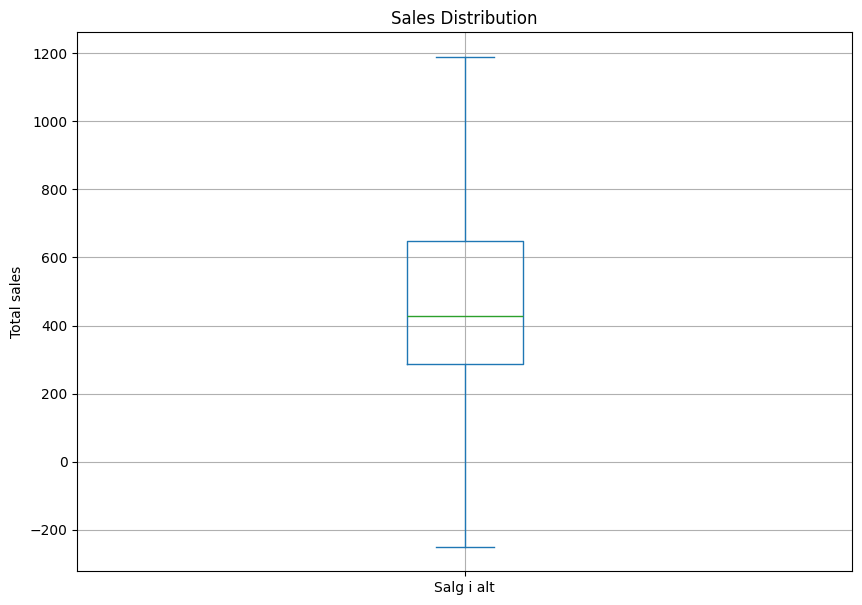

In [256]:
ax = df["Salg i alt"].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)
ax.set_ylabel("Total sales")
ax.set_title("Sales Distribution")

plt.show()

In [257]:
df["Salg i alt"].describe()

count    4328.000000
mean      527.249466
std       470.606532
min     -1765.000000
25%       286.000000
50%       427.000000
75%       648.610000
max      7611.000000
Name: Salg i alt, dtype: float64

In [258]:
pd.DataFrame(df["Salg i alt"].describe())

,Salg i alt
count,4328.000000
mean,527.249466
std,470.606532
min,-1765.000000
25%,286.000000
50%,427.000000
75%,648.610000
max,7611.000000


In [259]:
df.loc[df['Salg i alt'] > 0].shape

(4150, 13)

In [260]:
df = df.loc[df['Salg i alt'] > 0].copy()

In [261]:
df.shape

(4150, 13)

In [262]:
monthly_orders_df = df.set_index("Dag")["Ordre-id"].resample("ME").nunique()

In [263]:
monthly_orders_df

Dag
2025-01-31     415
2025-02-28     210
2025-03-31    1406
2025-04-30    1172
2025-05-31     242
2025-06-30     210
2025-07-31     214
2025-08-31     281
Freq: ME, Name: Ordre-id, dtype: int64

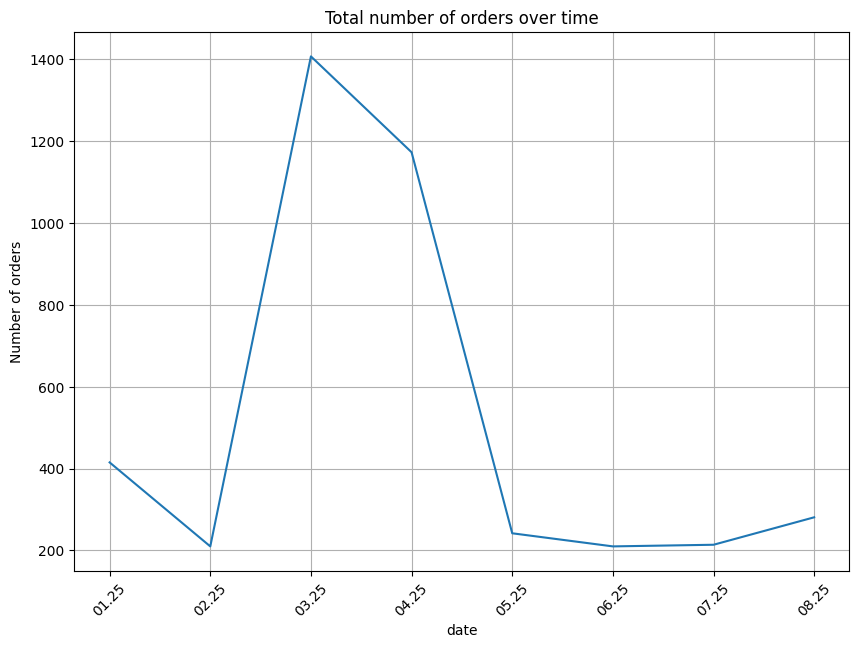

In [264]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel("date")
ax.set_ylabel("Number of orders")
ax.set_title("Total number of orders over time")

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

In [265]:
df.tail()

,Dag,Kunde-id,Ordre-id,Ordrer,Bruttoomsætning,Rabatter,Returneringer,Nettoomsætning,Leveringsgebyrer,Told,Yderligere gebyrer,Skatter,Salg i alt
4323,2025-08-31,23128057250136,11701649473880,1,1039.2,-415.68,0.0,623.52,0.0,0,0,155.88,779.4
4324,2025-08-31,8439675847000,11700666958168,1,1508.8,-754.40,0.0,754.40,0.0,0,0,188.60,943.0
4325,2025-08-31,23128032280920,11701622866264,1,987.2,-98.72,0.0,888.48,0.0,0,0,222.12,1110.6
4326,2025-08-31,23127578280280,11701181186392,1,796.0,-318.40,0.0,477.60,0.0,0,0,119.40,597.0
4327,2025-08-31,23117411189080,11701158609240,1,270.4,0.00,0.0,270.40,39.2,0,0,77.40,387.0


In [266]:
order_customer_df = df.groupby(
    by=["Ordre-id", "Dag"]
).agg(
    total_sales=pd.NamedAgg(column="Salg i alt", aggfunc="sum"),
    customer_id=pd.NamedAgg(column="Kunde-id", aggfunc="max")
).reset_index()

In [267]:
order_customer_df.tail()

,Ordre-id,Dag,total_sales,customer_id
4145,11701243314520,2025-08-31,244.2,22993932124504
4146,11701322449240,2025-08-31,506.2,23127718986072
4147,11701616083288,2025-08-31,2050.0,5820834021446
4148,11701622866264,2025-08-31,1110.6,23128032280920
4149,11701649473880,2025-08-31,779.4,23128057250136


In [268]:
repeat_customer_ids = order_customer_df['customer_id'].value_counts()
repeat_customer_ids = set(repeat_customer_ids[repeat_customer_ids > 1].index)

monthly_repeat_customers_df = order_customer_df.set_index("Dag").groupby(
    pd.Grouper(freq="ME")
).apply(lambda x: len(set(x['customer_id']) & repeat_customer_ids))

monthly_repeat_customers_df = pd.Series(monthly_repeat_customers_df.values, 
                                       index=monthly_repeat_customers_df.index)

In [269]:
monthly_repeat_customers_df

Dag
2025-01-31    121
2025-02-28     82
2025-03-31    303
2025-04-30    241
2025-05-31     76
2025-06-30     62
2025-07-31     59
2025-08-31     67
Freq: ME, dtype: int64

In [270]:
monthly_unique_customers_df = df.set_index("Dag")["Kunde-id"].resample("ME").nunique()

In [271]:
monthly_unique_customers_df

Dag
2025-01-31     389
2025-02-28     198
2025-03-31    1316
2025-04-30    1108
2025-05-31     232
2025-06-30     204
2025-07-31     202
2025-08-31     265
Freq: ME, Name: Kunde-id, dtype: int64

In [272]:
monthly_repeat_percentage = monthly_repeat_customers_df / monthly_unique_customers_df * 100.0
monthly_repeat_percentage

Dag
2025-01-31    31.105398
2025-02-28    41.414141
2025-03-31    23.024316
2025-04-30    21.750903
2025-05-31    32.758621
2025-06-30    30.392157
2025-07-31    29.207921
2025-08-31    25.283019
Freq: ME, dtype: float64

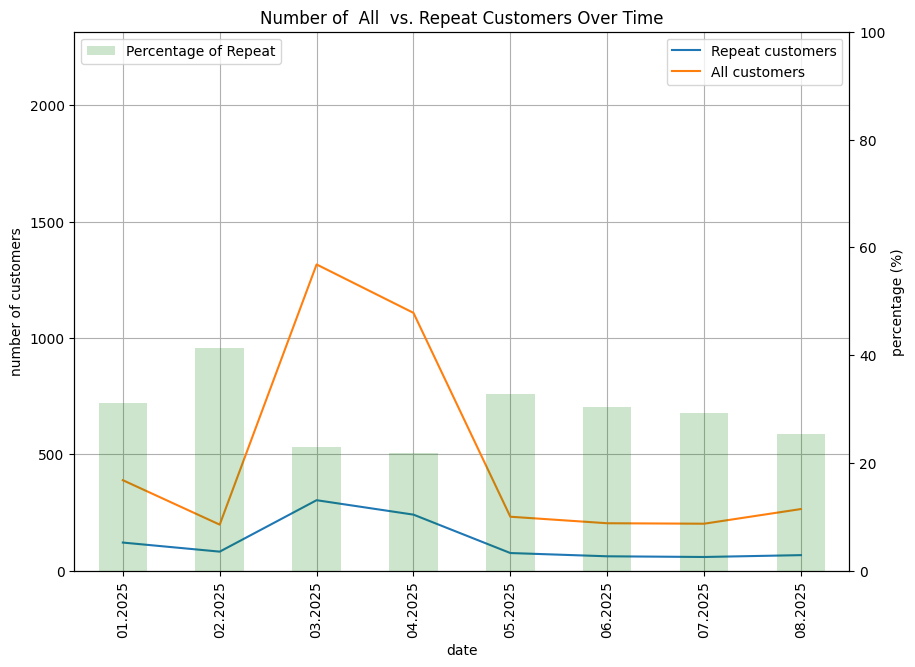

In [273]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=False,
    secondary_y=True,
    color="green",
    alpha=0.2
)

ax.set_xlabel("date")
ax.set_ylabel("number of customers")
ax.set_title("Number of  All  vs. Repeat Customers Over Time")

ax2.set_ylabel("percentage (%)")

ax.legend(["Repeat customers", "All customers"])
ax2.legend(["Percentage of Repeat"], loc="upper left")

ax.set_ylim([0, monthly_unique_customers_df.values.max()+1000])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime("%m.%Y") for x in monthly_repeat_customers_df.index],
    rotation=45
)

plt.show()

In [274]:
monthly_rev_repeat_customers_df = order_customer_df.set_index("Dag").groupby([
    pd.Grouper(freq="ME"), "customer_id"
]).filter(lambda x: len(x) >  1).resample("ME").sum()["total_sales"]

In [275]:
monthly_rev_repeat_customers_df

Dag
2025-01-31     28984.80
2025-02-28     12859.00
2025-03-31    102077.65
2025-04-30     64250.56
2025-05-31     15966.20
2025-06-30      6317.99
2025-07-31     17392.50
2025-08-31     24670.50
Freq: ME, Name: total_sales, dtype: float64

In [276]:
monthly_revenue_df = df.set_index('Dag')['Salg i alt'].resample('ME').sum()

In [277]:
monthly_revenue_df

Dag
2025-01-31    204936.80
2025-02-28    113411.40
2025-03-31    790879.45
2025-04-30    588649.89
2025-05-31    170897.50
2025-06-30    130995.14
2025-07-31    135210.30
2025-08-31    186215.82
Freq: ME, Name: Salg i alt, dtype: float64

In [278]:
monthly_rev_perc_repeat_customers_df  = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0 

In [279]:
monthly_rev_perc_repeat_customers_df

Dag
2025-01-31    14.143287
2025-02-28    11.338366
2025-03-31    12.906853
2025-04-30    10.914902
2025-05-31     9.342559
2025-06-30     4.823072
2025-07-31    12.863295
2025-08-31    13.248337
Freq: ME, dtype: float64

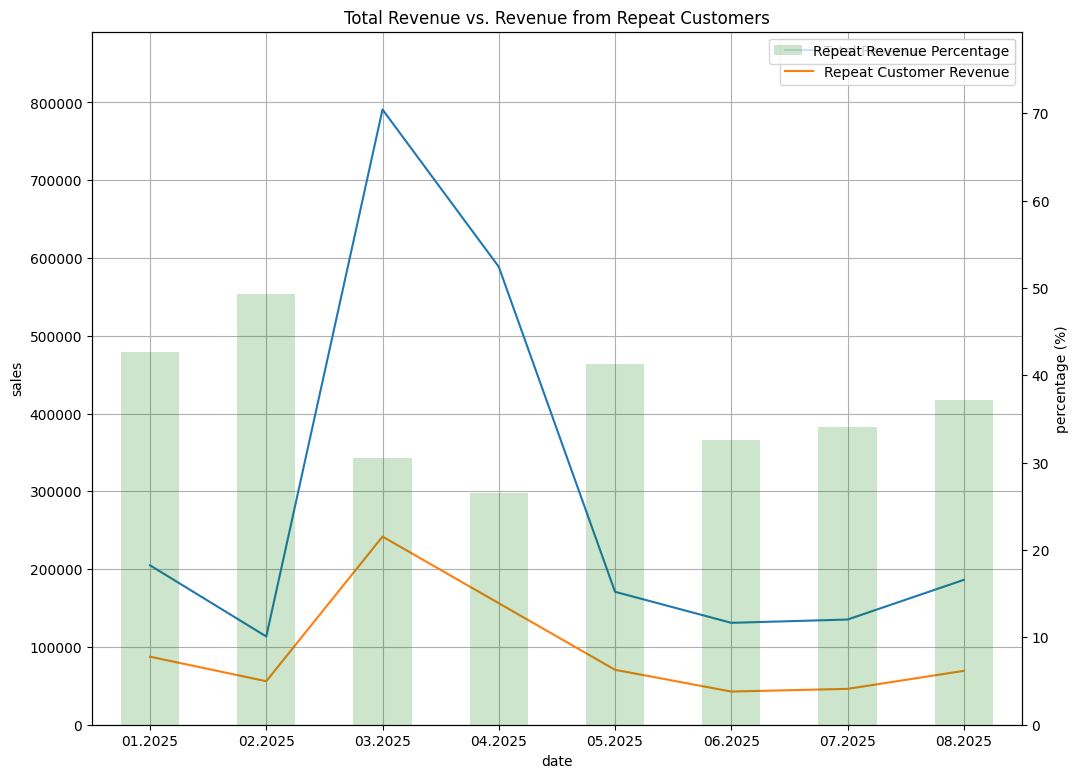

In [ ]:
repeat_customer_ids = order_customer_df['customer_id'].value_counts()
repeat_customer_ids = set(repeat_customer_ids[repeat_customer_ids > 1].index)

monthly_rev_repeat_customers_df = order_customer_df.set_index("Dag").copy()
monthly_rev_repeat_customers_df['is_repeat'] = monthly_rev_repeat_customers_df['customer_id'].isin(repeat_customer_ids)
monthly_rev_repeat_customers_df = monthly_rev_repeat_customers_df[monthly_rev_repeat_customers_df['is_repeat']].resample('ME').sum()['total_sales']

monthly_revenue_df = df.set_index('Dag')['Salg i alt'].resample('ME').sum()

monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df / monthly_revenue_df * 100.0

ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title("Total Revenue vs. Revenue from Repeat Customers")

ax.legend(["Total Revenue", "Repeat Customer Revenue"])

ax.set_ylim([0, max(monthly_revenue_df.values)+10**5])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind="bar",
    color="g",
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel("percentage (%)")
ax2.legend(["Repeat Revenue Percentage"])

ax2.set_xticklabels([
    x.strftime("%m.%Y") for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()